In [8]:
import sys
sys.path.insert(0, '..')
import os
import glob
from filament import filament
import datetime
import cmocean
import logging
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from importlib import reload
import matplotlib as mpl
reload(filament)
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
myproj = ccrs.PlateCarree()
coast = cfeature.GSHHSFeature(scale="f")

In [2]:
logger = logging.getLogger("filamentPlotChloro")
logger.setLevel(logging.INFO)
logging.info("Starting")
plotvis = 1

In [9]:
figdir = "../figures/chloro/"
datafile = "/data/Chloro/V2020001134200.L2_SNPP_OC.nc"
datafile = "/data/Chloro/V2017247140000.L2_SNPP_OC.nc"
chloro = filament.Chloro()
chloro.read_from_oceancolorL2(datafile)

In [4]:
coordinates = (-20, -10, 25., 32)
coordinates = (-19., -6., 25., 35.)
smalldomain = (-15., -9., 27., 33.)
tinydomain = (-12., -9., 29.5, 32.)
canarydomain = (-18.5, -13., 25., 29.5)
m = Basemap(projection='merc', llcrnrlon=coordinates[0], llcrnrlat=coordinates[2],
            urcrnrlon=coordinates[1], urcrnrlat=coordinates[3],
            lat_ts=0.5 * (coordinates[2] + coordinates[3]), resolution='h')

In [13]:
chloro.fname = datafile
figname = chloro.get_figname()

'V2017247140000-L2_SNPP_OC'

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection=myproj)
plt.title(datetime.datetime.strftime(chloro.date, "%Y-%m-%d"), fontsize=16)

chloro.add_to_plot(fig, ax, domain=coordinates, cmap=plt.cm.YlGnBu_r,
                clim=[0.05, 3.], vis=False,
                cbarloc=[0.65, 0.25, 0.2, 0.015],
                alpha=1, extend="both")

ax.add_feature(coast, linewidth=.2, color=".75")
filament.decorate_map(ax, coordinates, np.arange(-19., -7., 3.), 
                      np.arange(25., 35., 2.))
plt.savefig(os.path.join(figdir, figname), dpi=300, bbox_inches="tight",
           facecolor="w", transparent=False)
#plt.show()
plt.close()

## SST at the same date

In [31]:
with netCDF4.Dataset(sstfile) as nc:
    qf = nc.groups['geophysical_data'].variables["flags_sst"][:]

masked_array(
  data=[[1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., -1760, -18144, -18144],
        ...,
        [-19712, -19712, 13056, ..., 12544, 12544, 14592],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=-32767,
  dtype=int16)

In [40]:
figdir = "../figures/SST/"
sstfile = "/data/SST/CapeGhir/V2017247140000.L2_SNPP_SST.nc"
sst = filament.SST()
sst.read_from_oceancolorL2(sstfile)
sst.apply_qc()

figname = sst.get_figname()

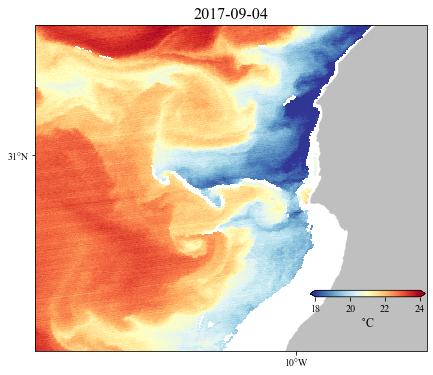

In [42]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection=myproj)
plt.title(datetime.datetime.strftime(chloro.date, "%Y-%m-%d"), fontsize=16)

sst.add_to_plot(fig, ax, domain=tinydomain, cmap=plt.cm.RdYlBu_r,
                clim=[18., 24.], vis=False,
                cbarloc=[0.65, 0.25, 0.2, 0.015],
                alpha=1)

ax.add_feature(coast, linewidth=.2, color=".75")
filament.decorate_map(ax, tinydomain, np.arange(-19., -7., 3.), 
                      np.arange(25., 35., 2.))
#plt.savefig(os.path.join(figdir, figname), dpi=300, bbox_inches="tight",
#           facecolor="w", transparent=False)
plt.show()
plt.close()

## Wind from ASCAT

In [43]:
windfile = "/data/Wind/ASCAT/GranCanaria/ascat_20170904_212400_metopa_56447_eps_o_coa_2401_ovw.l2.nc.gz"

In [44]:
wind = filament.Wind()
wind.read_from_quikscat(windfile)
wind.compute_speed()

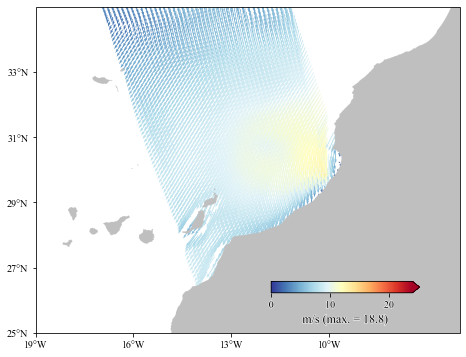

In [54]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection=myproj)

#plt.title(datetime.datetime.strftime(chloro.date, "%Y-%m-%d"), fontsize=16)

wind.add_to_plot(fig, ax, domain=coordinates, cmap=plt.cm.RdYlBu_r,
                 clim=[0., 24.], vis=False,
                 quivscale=200, quivwidth=0.002
                )

ax.add_feature(coast, linewidth=.2, color=".75")
filament.decorate_map(ax, coordinates, np.arange(-19., -7., 3.), 
                      np.arange(25., 35., 2.))

#plt.savefig(os.path.join(figdir, figname), dpi=300, bbox_inches="tight",
#           facecolor="w", transparent=False)
plt.show()
plt.close()

In [57]:
windfile = "/data/Wind/CCMP/CCMP_RT_Wind_Analysis_20170904_V02.1_L3.0_RSS.nc"

In [69]:
wind = filament.Wind()
wind.read_from_ccmp(windfile)
wind.u = wind.u[0,:,:]
wind.v = wind.v[0,:,:]
wind.compute_speed()

(628, 1440)

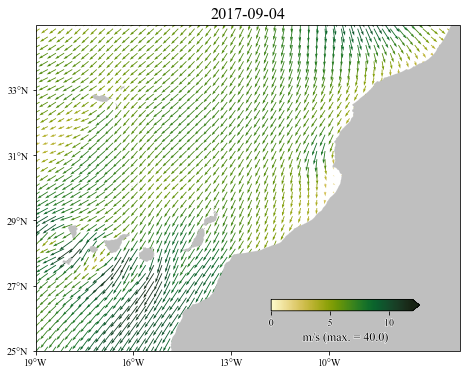

In [75]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection=myproj)

plt.title(datetime.datetime.strftime(chloro.date, "%Y-%m-%d"), fontsize=16)

wind.add_to_plot(fig, ax, domain=coordinates, cmap=cmocean.cm.speed,
                 clim=[0., 12.], vis=False,
                 quivscale=250, quivwidth=0.002
                )

ax.add_feature(coast, linewidth=.2, color=".75")
filament.decorate_map(ax, coordinates, np.arange(-19., -7., 3.), 
                      np.arange(25., 35., 2.))

plt.savefig(os.path.join(figdir, "wind_CCPM_20170904"), dpi=300, bbox_inches="tight",
           facecolor="w", transparent=False)
plt.show()
plt.close()